In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [4]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='relu'),
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001), # To obtain more accurate models put this value to 0.00001
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=30, # To obtain more accurate models put this value to 3000 and restart the simulation properly if stuck in a local maximum
    validation_data=ds_test,
)

Epoch 1/30
469/469 [==============================] - 21s 11ms/step - loss: 0.8880 - sparse_categorical_accuracy: 0.7604 - val_loss: 0.5891 - val_sparse_categorical_accuracy: 0.8284
Epoch 2/30
469/469 [==============================] - 1s 3ms/step - loss: 0.5651 - sparse_categorical_accuracy: 0.8272 - val_loss: 0.5221 - val_sparse_categorical_accuracy: 0.8366
Epoch 3/30
469/469 [==============================] - 1s 3ms/step - loss: 0.5220 - sparse_categorical_accuracy: 0.8341 - val_loss: 0.4957 - val_sparse_categorical_accuracy: 0.8400
Epoch 4/30
469/469 [==============================] - 1s 3ms/step - loss: 0.5011 - sparse_categorical_accuracy: 0.8379 - val_loss: 0.4827 - val_sparse_categorical_accuracy: 0.8423
Epoch 5/30
469/469 [==============================] - 1s 2ms/step - loss: 0.4882 - sparse_categorical_accuracy: 0.8395 - val_loss: 0.4767 - val_sparse_categorical_accuracy: 0.8425
Epoch 6/30
469/469 [==============================] - 1s 3ms/step - loss: 0.4790 - sparse_categori

NN weights:

In [9]:
#dir(model.layers[0])
for i in range(784):
  print(model.layers[1].get_weights()[0][i])
print(model.layers[1].get_weights()[1])

[-0.02738015  0.04791401  0.02485514 -0.00485761  0.07793792 -0.01909662
  0.00043401  0.08178357 -0.04208989  0.0598712 ]
[-0.05129724 -0.08070283 -0.03724675 -0.0421246  -0.01319915 -0.07343305
 -0.03578466  0.05404385 -0.00513618 -0.04156538]
[-0.01217249 -0.05872726 -0.04617159 -0.00911676 -0.00518418 -0.08338327
 -0.03418807  0.05997678 -0.06372681  0.01634473]
[-0.04502495 -0.01414654  0.0010934   0.00715453  0.01507641 -0.01406813
 -0.02450795  0.00161319 -0.04771299 -0.00437997]
[ 0.02092598 -0.03694535  0.02099962 -0.00246391  0.05830609  0.03554112
 -0.03845714  0.03243747 -0.0112585   0.00298995]
[ 0.07419961 -0.03962011  0.03402981 -0.07720955 -0.07536811 -0.01897983
 -0.00631455  0.0446543   0.04923014 -0.05586622]
[-0.06388035 -0.06026513  0.00748455  0.0013735   0.04848158  0.03905229
  0.02272502 -0.07049996  0.04639598 -0.08561704]
[ 0.0819444  -0.05796746  0.01486985  0.01576302  0.01071561  0.07501622
  0.03641944 -0.0782645   0.0404525   0.01657932]
[-0.06546307  0.

Some tests:

Image label: 3


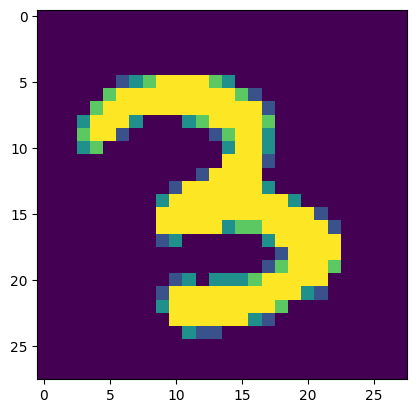

79/79 [==============================] - 0s 2ms/step
[ 0.        0.        5.826521 15.361548  0.        0.        0.
  0.        0.        0.      ]

Model predicted label: 3


In [7]:
def index_of_max(a):
  l = a[0]
  k = 0
  for i in range(10):
    if (a[i]>l):
      l = a[i]
      k = i
  return k


import random

a = list(ds_test)

# With these 2 lines of code some elements of the test set will never be seen...
number_of_image = random.randint(0,77)
number_of_image_in_batch = random.randint(0,127)

print("Image label: "+str(a[number_of_image][1][number_of_image_in_batch].numpy()))

from matplotlib import pyplot as plt
plt.imshow(a[number_of_image][0][number_of_image_in_batch].numpy(), interpolation='nearest')
plt.show()

a=list(model.predict(ds_test))[128*number_of_image+number_of_image_in_batch]
print(a)
print()
print("Model predicted label: "+str(index_of_max(a)))


Data x_seed:

Image label: 2


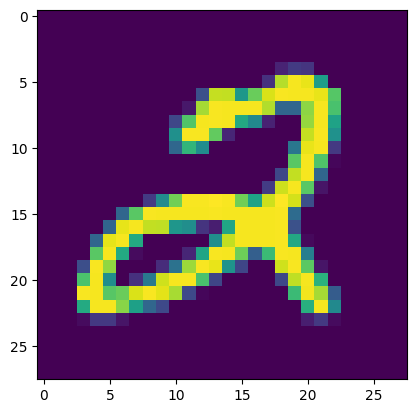

79/79 [==============================] - 0s 2ms/step
Model predicted label: 2
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
25 25 25
43 43 43
39 39 39
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0

In [8]:
def generate_data(a):
  for i in range(28):
    for j in range(28):
      print(str(round(a[number_of_image][0][number_of_image_in_batch].numpy()[i][j].item()*255))+" "+str(round(a[number_of_image][0][number_of_image_in_batch].numpy()[i][j].item()*255))+" "+str(round(a[number_of_image][0][number_of_image_in_batch].numpy()[i][j].item()*255)))
      #print(str((a[number_of_image][0][number_of_image_in_batch].numpy()[i][j].item())))


a = list(ds_test)

number_of_image = 0
number_of_image_in_batch = 0

print("Image label: "+str(a[number_of_image][1][number_of_image_in_batch].numpy()))

from matplotlib import pyplot as plt
plt.imshow(a[number_of_image][0][number_of_image_in_batch].numpy(), interpolation='nearest')
plt.show()

b=list(model.predict(ds_test))[128*number_of_image+number_of_image_in_batch]
print("Model predicted label: "+str(index_of_max(b)))

#print(b)
generate_data(a)